##Task 1

Instructions from the notebook: https://github.com/fedhere/PUI2015_fbianco/blob/master/citibikes/citibikes_compare_distributions.ipynb

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import json
import math

Populating the interactive namespace from numpy and matplotlib


I am reading in data from June 2015   201506-citibike-tripdata

In [2]:
df=pd.read_csv('201506-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


# By Gender

splitting data by gender and extracting the age happens in the cell below

In [3]:
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

Plot age in 10 year bins. 

*the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

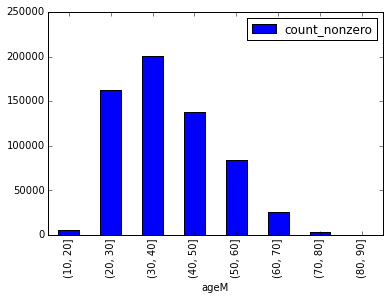

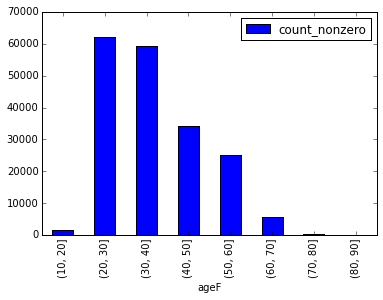

In [4]:
#groups
bins = np.arange(10, 99, 10)    #numbers between 10 and 99, each step has a length of 10
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

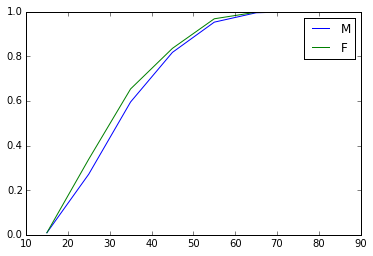

In [5]:
#print df.ageS, df.ageS.cumsum()  

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()   #Cummulative values
csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

#print np.abs((csM / csM.max())-(csF / csF.max()))    #Distances
#Plotting the cummulative distribution ( NORMALIZING) 
pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

## KS test

In [6]:
import scipy.stats

In [7]:
ageM=df.ageM.dropna()
ageF=df.ageF.dropna()

ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

(0.45996202796586128, 0.0)


The p-value is 0.0, that means that is less than our $\alpha=0.05$ and we fail to reject the Null Hypothesis (based on the distance between both cummulative distributions, the samples don't follow the same parent distribution). However, our KS value is $0.46$ which is a big number in the range $[ 0 , 1 ]$!

But what happen if we calculate the maximum distance between the cummulative functions?

The steps for calculating the KS test are:

1 Step: Calculate every value of $$D_K S (n_1, n_2) = \max  (F_{n_1} (x) - F_{n_2} (x))$$

2 Step: We calculate $$c (\alpha) \cdot \sqrt{ \frac{N_1 + N_2}{N_1 N_2}}$$

3 Step: compare $D_K S (n_1, n_2)$ and the value calculated in step 2

In [8]:
#1 Step
DKS=np.max(np.abs((csM / csM.max())-(csF / csF.max())))   #Distances
print DKS

count_nonzero    0.06716
dtype: float64


In [9]:
#2 Step
#for our alpha value = 0.05, c(alpha)=1.36
n1=csM.count()
n2=csF.count()
S2=1.36 * math.sqrt((n1+n2)/(n1*n2))
print S2

0.68


Comparing both values, we fail to reject the Null Hypothesis at a conffidence interval of 95%, as we conclude using the scipy.stats.ks_2samp function.
However, the $D_K S$ value obtained "by hand" is really different from the value obtained by using the python function (I may be doing something wrong in here ...)

##Pearson's test for correlation

In [10]:
scipy.stats.pearsonr(ageF, ageM[0:len(ageF)])   #the number of elements in both dataframes must be the same

(-0.0016473353019557809, 0.47429612689865996)

The correlation coefficient is really close to zero ($-0.00164$). That means that there is not a meaningfull correlation between the two data sets under the pearson test. 

##Spearman's test for correlation

In [11]:
scipy.stats.spearmanr(ageF, ageM[0:len(ageF)])

(-0.0026623740694715937, 0.24752515440540487)

Again, we got a negative correlation coefficient but too close to zero, that means that there is not a meaningful correlation between the two data sets under this test. 

##Riders during the day vs during the night time

In [12]:
#first, I wanna see how my data look like:
df.starttime[:5]

0    6/1/2015 0:00
1    6/1/2015 0:00
2    6/1/2015 0:01
3    6/1/2015 0:01
4    6/1/2015 0:02
Name: starttime, dtype: object

In [13]:
hours_data= pd.DatetimeIndex(df['starttime']).hour
hours_data[:5]    ##takes a while to run

array([0, 0, 0, 0, 0])

In [14]:
df['start_hour']=hours_data

In [21]:
df['age_night'] = 2015-df['birth year'][(df['start_hour'] < 6) | (df['start_hour'] >= 18)]
df['age_day'] = 2015-df['birth year'][(df['start_hour'] >= 6) & (df['start_hour'] < 18)]
print df[['age_night','age_day' , 'start_hour']][1:20]

    age_night  age_day  start_hour
1          18      NaN           0
2          22      NaN           0
3          34      NaN           0
4         NaN      NaN           0
5          39      NaN           0
6          39      NaN           0
7          53      NaN           0
8          42      NaN           0
9          57      NaN           0
10         51      NaN           0
11         33      NaN           0
12         30      NaN           0
13         26      NaN           0
14         32      NaN           0
15         39      NaN           0
16         30      NaN           0
17         60      NaN           0
18         38      NaN           0
19         31      NaN           0


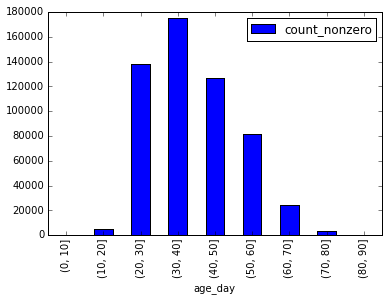

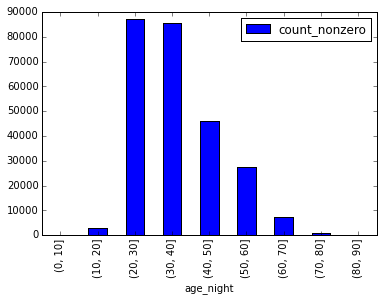

In [16]:
bins = np.arange(0, 99, 10)
df.age_day.groupby(pd.cut(df.age_day, bins)).agg([count_nonzero]).plot(kind='bar')
df.age_night.groupby(pd.cut(df.age_night, bins)).agg([count_nonzero]).plot(kind='bar')

In [17]:
age_night=df.age_night[~np.isnan(df.age_night)]
age_day=df.age_day[~np.isnan(df.age_day)]
#.sample(239342)
print len(age_day), len(age_night)

553683 257144


In [18]:
scipy.stats.ks_2samp(age_night, age_day)

(0.11728297669452353, 0.0)

In [19]:
scipy.stats.pearsonr(age_night, age_day[0:len(age_night)])

(-2.6692839607712014e-05, 0.98920039991422493)

In [20]:
scipy.stats.spearmanr(age_night, age_day[0:len(age_night)])

(-0.00026896718764520455, 0.8915122669199691)

From the three tests, we can confirm that the coefficents are close to zero. So this two study groups don't follow the same parent distribution. 